<a href="https://colab.research.google.com/github/taqiyyaghazi/price_predict_melbourne_housing_market/blob/main/House_Price_Predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opendatasets numpy pandas matplotlib seaborn --quiet

# DOWNLOAD DATA

In [ ]:
import os
import opendatasets as od
import pandas as pd
pd.set_option("display.max_columns", 120)
pd.set_option("display.max_rows", 120)

In [ ]:
od.download('https://www.kaggle.com/anthonypino/melbourne-housing-market')

Skipping, found downloaded files in "./melbourne-housing-market" (use force=True to force download)


In [ ]:
os.listdir('melbourne-housing-market')

['MELBOURNE_HOUSE_PRICES_LESS.csv', 'Melbourne_housing_FULL.csv']

In [ ]:
raw_df = pd.read_csv('./melbourne-housing-market/MELBOURNE_HOUSE_PRICES_LESS.csv')

In [ ]:
raw_df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
0,Abbotsford,49 Lithgow St,3,h,1490000.0,S,Jellis,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
1,Abbotsford,59A Turner St,3,h,1220000.0,S,Marshall,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
2,Abbotsford,119B Yarra St,3,h,1420000.0,S,Nelson,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
3,Aberfeldie,68 Vida St,3,h,1515000.0,S,Barry,1/04/2017,3040,Western Metropolitan,1543,7.5,Moonee Valley City Council
4,Airport West,92 Clydesdale Rd,2,h,670000.0,S,Nelson,1/04/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council


In [ ]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63023 entries, 0 to 63022
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         63023 non-null  object 
 1   Address        63023 non-null  object 
 2   Rooms          63023 non-null  int64  
 3   Type           63023 non-null  object 
 4   Price          48433 non-null  float64
 5   Method         63023 non-null  object 
 6   SellerG        63023 non-null  object 
 7   Date           63023 non-null  object 
 8   Postcode       63023 non-null  int64  
 9   Regionname     63023 non-null  object 
 10  Propertycount  63023 non-null  int64  
 11  Distance       63023 non-null  float64
 12  CouncilArea    63023 non-null  object 
dtypes: float64(2), int64(3), object(8)
memory usage: 6.3+ MB


# PREPROCESSING DATA

## Impute Missing Value

In [ ]:
raw_df.isna().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price            14590
Method               0
SellerG              0
Date                 0
Postcode             0
Regionname           0
Propertycount        0
Distance             0
CouncilArea          0
dtype: int64

The Price column has 14,590 error values

In [ ]:
import plotly.express as px
df = px.data.tips()
fig = px.box(raw_df, y="Price")
fig.show()

Because there are many outliers from the boxplot, it is not appropriate to replace the NaN value with the mean so that the median value of the data is used.

In [ ]:
fix_df = raw_df.fillna(raw_df['Price'].median())


In [ ]:
fix_df.isna().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Postcode         0
Regionname       0
Propertycount    0
Distance         0
CouncilArea      0
dtype: int64

## Categorical and Numerical Column Initiation

In [ ]:
cols = fix_df.select_dtypes(include=object).columns
for col in cols:
  print(col + ', ', end='')

Suburb, Address, Type, Method, SellerG, Date, Regionname, CouncilArea, 

In [ ]:
cols = fix_df.select_dtypes(exclude=object).columns
for col in cols:
  print(col + ', ', end='')

Rooms, Price, Postcode, Propertycount, Distance, 

In [ ]:
numeric_cols = ['Rooms', 'Price', 'Postcode', 'Propertycount', 'Distance']
categorical_cols= ['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Regionname', 'CouncilArea']

# Exploration Data Analysis

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [ ]:
fix_df[numeric_cols].describe() 

,Rooms,Price,Postcode,Propertycount,Distance
count,63023.000000,6.302300e+04,63023.000000,63023.000000,63023.000000
mean,3.110595,9.590293e+05,3125.673897,7617.728131,12.684829
std,0.957551,5.250812e+05,125.626877,4424.423167,7.592015
min,1.000000,8.500000e+04,3000.000000,39.000000,0.000000
25%,3.000000,6.770000e+05,3056.000000,4380.000000,7.000000
50%,3.000000,8.300000e+05,3107.000000,6795.000000,11.400000
75%,4.000000,1.065000e+06,3163.000000,10412.000000,16.700000
max,31.000000,1.120000e+07,3980.000000,21650.000000,64.100000


In [ ]:
fix_df[categorical_cols].describe() 

,Suburb,Address,Type,Method,SellerG,Regionname,CouncilArea
count,63023,63023,63023,63023,63023,63023,63023
unique,380,57754,3,9,476,8,34
top,Reservoir,5 Charles St,h,S,Barry,Southern Metropolitan,Boroondara City Council
freq,1241,7,45053,34063,6894,17559,5132


In [ ]:
fig = px.scatter_matrix(fix_df,
    dimensions=['Rooms', 'Price', 'Postcode', 'Propertycount', 'Distance'],
    color="Type")
fig.show()

It can be concluded:
* Type h (house, cottage, villa, semi, terrace) has a higher price than other types

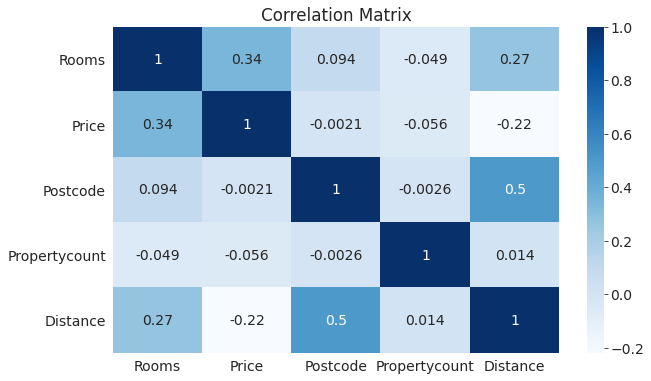

In [ ]:
sns.heatmap(fix_df.corr(), cmap='Blues', annot=True)
plt.title('Correlation Matrix');

# Preparing the Data for Training

## Initiation of dependent and independent variables

In [ ]:
fix_df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Postcode', 'Regionname', 'Propertycount', 'Distance',
       'CouncilArea'],
      dtype='object')

In [ ]:
X = fix_df[['Suburb', 'Address', 'Rooms', 'Type', 'Method', 'SellerG', 'Postcode', 'Regionname', 'Propertycount', 'Distance', 'CouncilArea']]
y = fix_df[['Price']]

## Data Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Encode Categorical Column

Encode X_train

In [ ]:
dummy = pd.get_dummies(X_train[['Type', 'Method', 'Regionname', 'CouncilArea']], 
                       prefix=['Type', 'Method', 'Regionname', 'CouncilArea'],drop_first=True)
X_train= pd.concat([X_train, dummy], axis=1)

In [ ]:
X_train = X_train.drop(['Type', 'Method', 'Regionname', 'CouncilArea'], axis=1)

Encode X_test

In [ ]:
dummy = pd.get_dummies(X_test[['Type', 'Method', 'Regionname', 'CouncilArea']], 
                       prefix=['Type', 'Method', 'Regionname', 'CouncilArea'],drop_first=True)
X_test= pd.concat([X_test, dummy], axis=1)


In [ ]:

X_test = X_test.drop(['Type', 'Method', 'Regionname', 'CouncilArea'], axis=1)

## Scalling Numeric Columns

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler().fit(X_train[['Distance', 'Propertycount', 'Rooms']])

In [ ]:
X_train[['Distance', 'Propertycount', 'Rooms']] = scaler.transform(X_train[['Distance', 'Propertycount', 'Rooms']])
X_test[['Distance', 'Propertycount', 'Rooms']] = scaler.transform(X_test[['Distance', 'Propertycount', 'Rooms']])

In [ ]:
encoded_cols = ['Type_t', 'Type_u', 'Method_PN', 'Method_S', 'Method_SA', 'Method_SN', 'Method_SP', 'Method_SS', 'Method_VB', 'Method_W', 
               'Regionname_Eastern Victoria', 'Regionname_Northern Metropolitan', 'Regionname_Northern Victoria', 
               'Regionname_South-Eastern Metropolitan', 'Regionname_Southern Metropolitan', 'Regionname_Western Metropolitan', 'Regionname_Western Victoria',
               'CouncilArea_Bayside City Council', 'CouncilArea_Boroondara City Council', 'CouncilArea_Brimbank City Council', 'CouncilArea_Cardinia Shire Council', 
               'CouncilArea_Casey City Council', 'CouncilArea_Darebin City Council', 'CouncilArea_Frankston City Council', 'CouncilArea_Glen Eira City Council', 
               'CouncilArea_Greater Dandenong City Council', 'CouncilArea_Hobsons Bay City Council', 'CouncilArea_Hume City Council', 'CouncilArea_Kingston City Council', 
               'CouncilArea_Knox City Council', 'CouncilArea_Macedon Ranges Shire Council', 'CouncilArea_Manningham City Council', 'CouncilArea_Maribyrnong City Council', 
               'CouncilArea_Maroondah City Council', 'CouncilArea_Melbourne City Council', 'CouncilArea_Melton City Council', 'CouncilArea_Mitchell Shire Council', 
               'CouncilArea_Monash City Council', 'CouncilArea_Moonee Valley City Council', 'CouncilArea_Moorabool Shire Council', 'CouncilArea_Moreland City Council', 
               'CouncilArea_Nillumbik Shire Council', 'CouncilArea_Port Phillip City Council', 'CouncilArea_Stonnington City Council', 
               'CouncilArea_Whitehorse City Council', 'CouncilArea_Whittlesea City Council', 'CouncilArea_Wyndham City Council', 'CouncilArea_Yarra City Council', 
               'CouncilArea_Yarra Ranges Shire Council']

## Create Input and Target Variables

In [ ]:
train_inputs = X_train[['Distance', 'Propertycount', 'Rooms'] + encoded_cols]
train_target = y_train
test_inputs = X_test[['Distance', 'Propertycount', 'Rooms'] + encoded_cols]
test_target = y_test

# Train Model with Linear Regression






In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np


## Define RMSE Function

In [ ]:
from sklearn.metrics import mean_squared_error

def rmse(a, b):
    return mean_squared_error(a, b, squared=False)

## Define Train and Evaluation Linear Regression Function

In [ ]:
def train_and_eval_regression(X_train, y_train, X_test, y_test):
  model = LinearRegression()
  model.fit(X_train, y_train)
  train_preds = model.predict(X_train)
  test_preds = model.predict(X_test)
  print('Train RMSE : {}, Test RMSE : {}'.format(rmse(train_preds, y_train), rmse(test_preds, y_test)))

## Define Tune Parameters Function

In [ ]:
def test_params(**params):
    model = LinearRegression(**params)
    model.fit(train_inputs, train_target)
    train_rmse = rmse(model.predict(train_inputs), train_target)
    test_rmse = rmse(model.predict(test_inputs), test_target)
    print('Train RMSE: {}, Validation RMSE: {}'.format(train_rmse, test_rmse))


## Test Parameters

In [ ]:
test_params(n_jobs=1)

Train RMSE: 406707.20947726525, Validation RMSE: 407363.37460622325


In [ ]:
test_params(n_jobs=-1)

Train RMSE: 406707.20947726525, Validation RMSE: 407363.37460622325


## Results Train and Evaluation Linear Regression

In [ ]:
train_and_eval_regression(train_inputs, train_target, test_inputs, test_target)

Train RMSE : 406707.20947726525, Test RMSE : 407363.37460622325


# Train Model with XGBoost

In [ ]:
from xgboost import XGBRegressor

## Define Train and Evaluation XGBoost Function

In [ ]:
def train_and_eval_xgboost(X_train, y_train, X_test, y_test, n_estimators, max_depth):
  model = XGBRegressor(random_state=42, n_jobs=-1, n_estimators=n_estimators, max_depth=max_depth)
  model.fit(X_train, y_train)
  train_preds = model.predict(X_train)
  test_preds = model.predict(X_test)
  print('Train RMSE : {}, Test RMSE : {}'.format(rmse(train_preds, y_train), rmse(test_preds, y_test)))

## Define Tune Parameters Function

In [ ]:
def test_params(**params):
    model = XGBRegressor(n_jobs=-1, random_state=42, **params)
    model.fit(train_inputs, train_target)
    train_rmse = rmse(model.predict(train_inputs), train_target)
    test_rmse = rmse(model.predict(test_inputs), test_target)
    #print('Train RMSE: {}, Validation RMSE: {}'.format(train_rmse, test_rmse))
    return train_rmse, test_rmse

## XGboost Test with Several Different n_estimators Parameter Values

In [ ]:
list_train_rmse, list_test_rmse = [], []
n = 20
for i in range(n):
  list_train_rmse.append(test_params(n_estimators=i)[0])
  list_test_rmse.append(test_params(n_estimators=i)[1])


[14:23:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:23:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:23:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:23:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:23:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:23:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:23:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:23:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

## Plot Error Rate

Text(0, 0.5, 'RMSE')

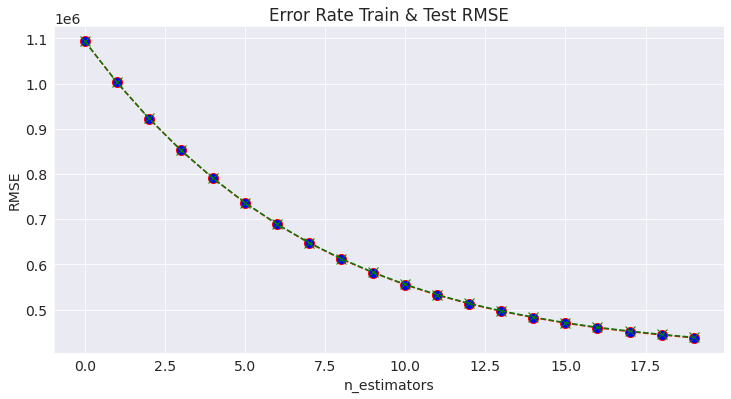

In [ ]:
plt.figure(figsize=(12, 6)) 
plt.plot(range(0, n), list_train_rmse, color='red', linestyle='dashed', marker='o', 
 markerfacecolor='blue', markersize=10)
plt.plot(range(0, n), list_test_rmse, color='green', linestyle='dashed', marker='x', 
 markerfacecolor='green', markersize=10)
plt.title('Error Rate Train & Test RMSE') 
plt.xlabel('n_estimators') 
plt.ylabel('RMSE')

## XGboost Test with Several Different max_depth Parameter Values

In [ ]:
list_train_rmse, list_test_rmse = [], []
n = 20
for i in range(n):
  list_train_rmse.append(test_params(max_depth=i)[0])
  list_test_rmse.append(test_params(max_depth=i)[1])


[14:12:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:12:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:12:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:12:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:12:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:12:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:12:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:12:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

## Plot Error Rate

Text(0, 0.5, 'RMSE')

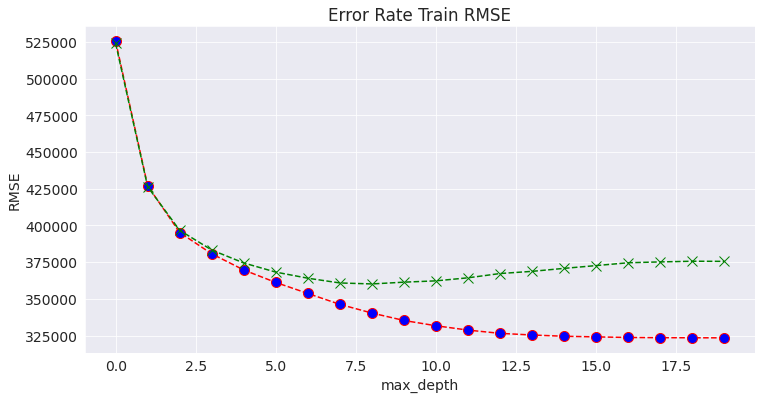

In [ ]:
plt.figure(figsize=(12, 6)) 
plt.plot(range(0, n), list_train_rmse, color='red', linestyle='dashed', marker='o', 
 markerfacecolor='blue', markersize=10, label='Train  RMSE')
plt.plot(range(0, n), list_test_rmse, color='green', linestyle='dashed', marker='x', 
 markerfacecolor='green', markersize=10, label='Test RMSE')
plt.title('Error Rate Train RMSE') 
plt.xlabel('max_depth') 
plt.ylabel('RMSE')

Train and evaluate the best parameters from error rate plot

In [ ]:
train_and_eval_xgboost(train_inputs, train_target, test_inputs, test_target, 20, 8)

[14:23:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train RMSE : 382618.00492687756, Test RMSE : 391686.9109233828


# Report The Best Model

In [ ]:
model = XGBRegressor(n_jobs=-1, random_state=42, n_estimators=20, max_depth=7)
model.fit(train_inputs, train_target)
train_rmse = rmse(model.predict(train_inputs), train_target)
test_rmse = rmse(model.predict(test_inputs), test_target)
print('Train RMSE : {}, Test RMSE : {}'.format(train_rmse, test_rmse))

[14:23:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train RMSE : 389711.43892490363, Test RMSE : 396153.42923478055


Dengan menggunakan model XGBoost dengan parameter 
* n_jobs=-1 
* random_state=42 
* n_estimators=20 
* max_depth=7 
didapatkan eror terkecil pada training dataset sebesar 389711.43 dan pada testing dataset sebesar 396153.42

# Save Model

In [ ]:
model.save_model("model.json")